In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
# Loading dataset
births_df = pd.read_csv('births.csv')

births_df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
# Q1
if 'Decade' not in births_df.columns:
    births_df.insert(5, 'Decade', ((births_df['year'] // 10) * 10), True)

births_df.head()

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [4]:
# Q2
births_df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [5]:
# Q3
births_df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

   Decade gender    births
0    1960      F   1753634
1    1960      M   1846572
2    1970      F  16263075
3    1970      M  17121550
4    1980      F  18310351
5    1980      M  19243452
6    1990      F  19479454
7    1990      M  20420553
8    2000      F  18229309
9    2000      M  19106428


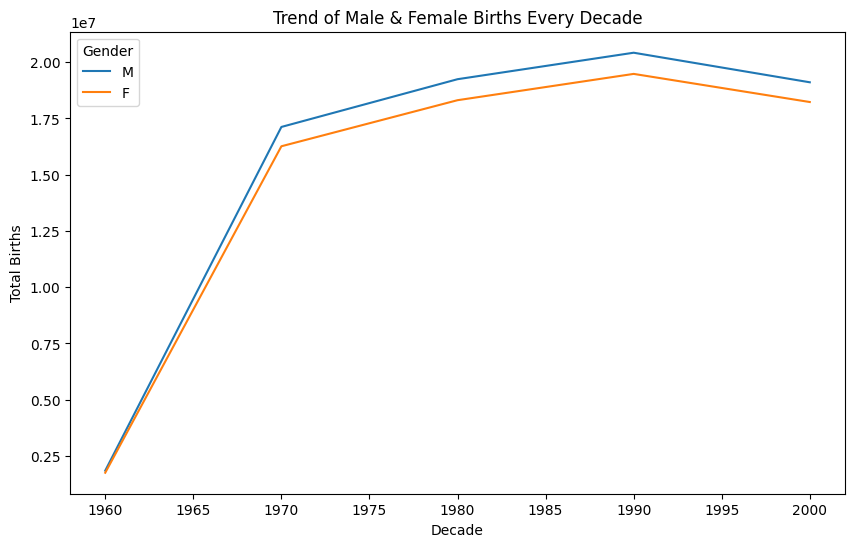

In [6]:
# Q4
# Grouping the data by 'Decade' and 'gender', and summing the 'births' for each group
trend_by_decade_gender = births_df.groupby(['Decade', 'gender'])['births'].sum().reset_index()

# Displaying the trends
print(trend_by_decade_gender)

# Visualizing the trends
fig, ax = plt.subplots(figsize=(10, 6))
for gender in ['M', 'F']:
    trend = trend_by_decade_gender[trend_by_decade_gender['gender'] == gender]
    ax.plot(trend['Decade'], trend['births'], label=gender)

ax.set_xlabel('Decade')
ax.set_ylabel('Total Births')
ax.set_title('Trend of Male & Female Births Every Decade')
ax.legend(title='Gender')

# Displaying plot
plt.show()

# Observation:
# Both Male and Female births incease over the decades and then naturally taper off after 1985. However, throughout this time, Male births always remain higher than female births.

In [7]:
# Q5
# Calculating mean and standard deviation for the 'births' column
mean_births = births_df['births'].mean()
std_births = births_df['births'].std()

# Defining the range for values to keep: within 5 standard deviations from the mean
lower_bound = mean_births - (5 * std_births)
upper_bound = mean_births + (5 * std_births)

# Making a new DataFrame by filtering the original DataFrame to exclude outliers
filtered_births_df = births_df[(births_df['births'] >= lower_bound) & (births_df['births'] <= upper_bound)]

# Comparing the shapes of the original and filtered DataFrames to see how many rows were removed
print("Original DataFrame shape:", births_df.shape)
print("Filtered DataFrame shape:", filtered_births_df.shape)

Original DataFrame shape: (15547, 6)
Filtered DataFrame shape: (15086, 6)


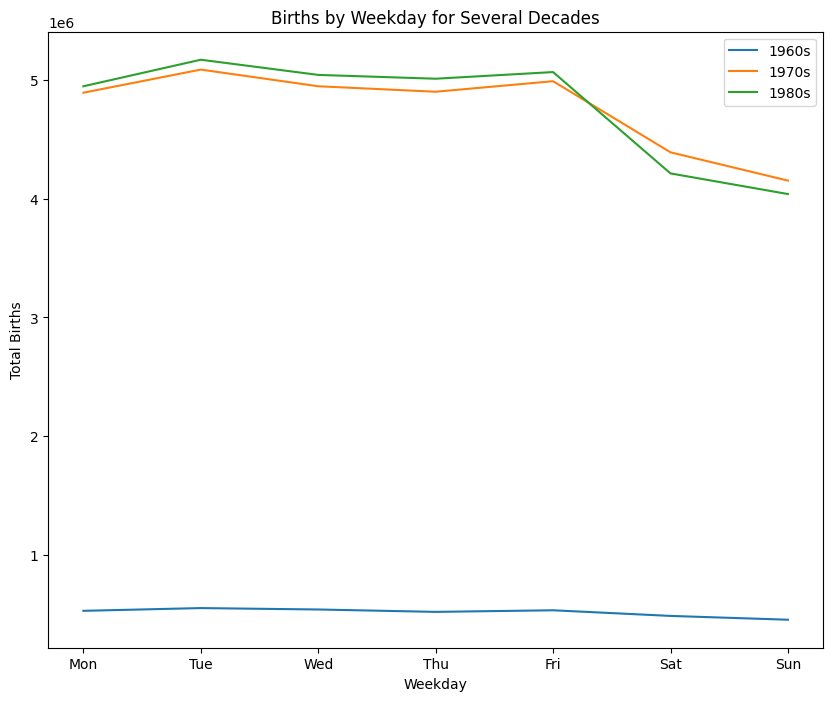

In [8]:
# Q6
# Checking for valid entries
valid_rows = births_df['day'] <= 31
births_df.loc[valid_rows, 'Date'] = pd.to_datetime(births_df.loc[valid_rows, ['year', 'month', 'day']], errors='coerce')

# Excluding rows where the 'Date' could not be calculated
births_df.dropna(subset=['Date'], inplace=True)

# Calculating the day of the week (0 = Monday, 6 = Sunday)
births_df['Weekday'] = births_df['Date'].dt.dayofweek

# Grouping by 'Decade' and 'Weekday' and summing the births
weekly_births_by_decade = births_df.groupby(['Decade', 'Weekday'])['births'].sum().unstack()

# Plotting
plt.figure(figsize=(10, 8))
for decade in weekly_births_by_decade.index:
    plt.plot(weekly_births_by_decade.columns, weekly_births_by_decade.loc[decade], label=f'{decade}s')

plt.xlabel('Weekday')
plt.ylabel('Total Births')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Births by Weekday for Several Decades')
plt.legend()

# Displaying plot
plt.show()

In [9]:
# Q7
# Grouping by month and summing the births
monthly_births = births_df.groupby('month')['births'].sum().reset_index()

# Displaying the grouped data
print("Births by Month:")
print(monthly_births)

Births by Month:
    month   births
0       1  5759165
1       2  5362585
2       3  5868140
3       4  5560775
4       5  5785220
5       6  5758571
6       7  6220295
7       8  6309764
8       9  6205972
9      10  6055372
10     11  5695273
11     12  5904376


In [10]:
# Grouping by day and summing the births
daily_births = births_df[births_df['day'] <= 31].groupby('day')['births'].sum().reset_index()

# Displaying the grouped data
print("Births by Day:")
print(daily_births)

Births by Day:
     day   births
0    1.0  2286854
1    2.0  2303168
2    3.0  2309087
3    4.0  2286588
4    5.0  2296951
5    6.0  2308073
6    7.0  2314081
7    8.0  2322376
8    9.0  2315055
9   10.0  2327197
10  11.0  2319561
11  12.0  2322956
12  13.0  2290896
13  14.0  2335551
14  15.0  2333426
15  16.0  2332456
16  17.0  2335458
17  18.0  2334949
18  19.0  2331183
19  20.0  2337631
20  21.0  2329563
21  22.0  2317711
22  23.0  2305174
23  24.0  2290500
24  25.0  2283975
25  26.0  2300208
26  27.0  2314088
27  28.0  2328630
28  29.0  2189092
29  30.0  2141690
30  31.0  1341380


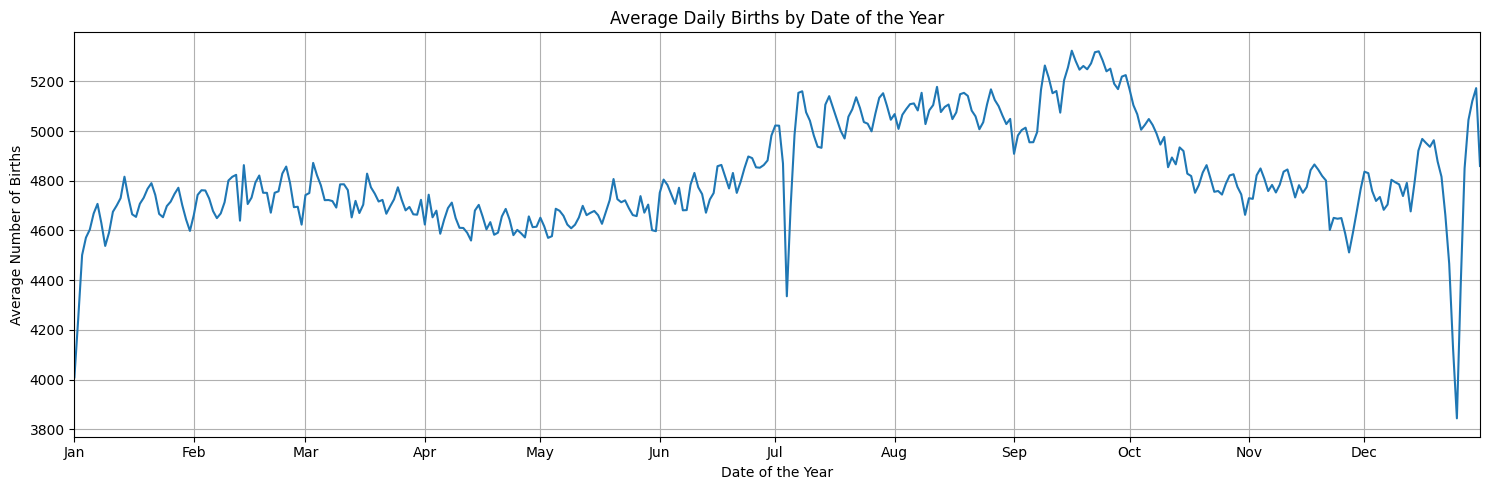

In [24]:
# Q8
births_df['date'] = pd.to_datetime(births_df[['month', 'day']].assign(year=2012), errors='coerce')

# Removing entries with NaN dates (which are the result of invalid dates like April 31st)
births_df = births_df.dropna(subset=['date'])

# Calculating the average number of births for each calendar day
average_births_by_date = births_df.groupby(births_df['date'].dt.strftime('%m-%d'))['births'].mean().reset_index()

# Converting 'date' back to a datetime format for plotting, using an arbitrary leap year to include February 29
average_births_by_date['date'] = pd.to_datetime('2012-' + average_births_by_date['date'])

# Plotting the data
plt.figure(figsize=(15, 5))

plt.plot(average_births_by_date['date'], average_births_by_date['births'], marker='', linestyle='-')
plt.title('Average Daily Births by Date of the Year')
plt.xlabel('Date of the Year')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.ylabel('Average Number of Births')

plt.xlim(left=pd.Timestamp('2012-01-01'))
plt.xlim(right=pd.Timestamp('2012-12-31'))

plt.grid(True)
plt.tight_layout()
plt.show()